In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv("sales_forecasting.csv", parse_dates=['Order Date'] , index_col='Order Date')
data.head()

,lower Sales,upper Sales
Order Date,,
2014-01-06,-3347.654702,3347.654702
2014-01-07,-3347.654702,3347.654702
2014-01-10,-3347.654702,3347.654702
2014-01-11,-3347.654702,3347.654702
2014-01-13,-3347.654702,3347.654702


In [45]:
data_group = data.resample('M').mean()

In [48]:
data  = data_group

In [56]:
data.head()

,lower Sales,upper Sales
Order Date,,
2014-01-31,-3100.919320,3496.891628
2014-02-28,-2497.813334,2930.016134
2014-03-31,-2162.980793,3264.848675
2014-04-30,-2012.551520,3415.277949
2014-05-31,-2113.757547,3314.071922


<Axes: xlabel='Order Date'>

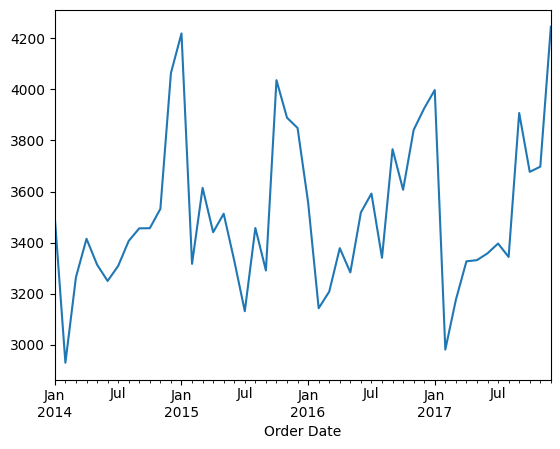

In [49]:
data['upper Sales'].plot()

# Train test split

In [50]:
size = int(len(data)*0.8)

train = data.iloc[:size]
test = data.iloc[size:]

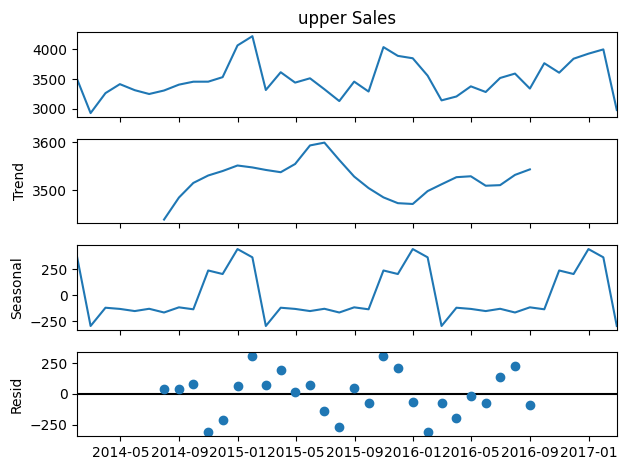

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(train['upper Sales'], model = 'additive' ,  period= 12)
decompose.plot()
plt.show()


In [52]:
from statsmodels.tsa.stattools import adfuller
adf = adfuller(train['upper Sales'])
adf

(-3.8582523279924135,
 0.0023644980765476055,
 9,
 28,
 {'1%': -3.6889256286443146,
  '5%': -2.9719894897959187,
  '10%': -2.6252957653061224},
 389.1599054517475)

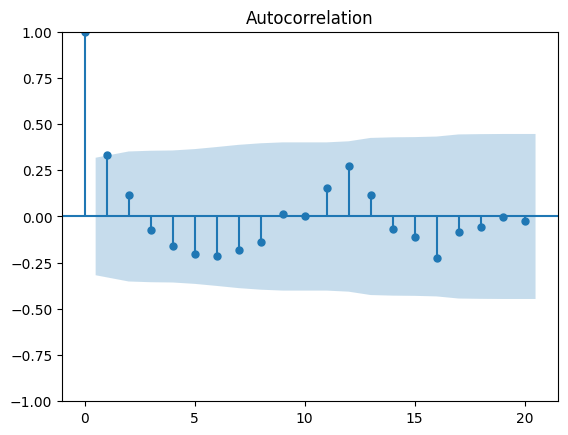

In [53]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(train['upper Sales'],lags=20)
plt.show()

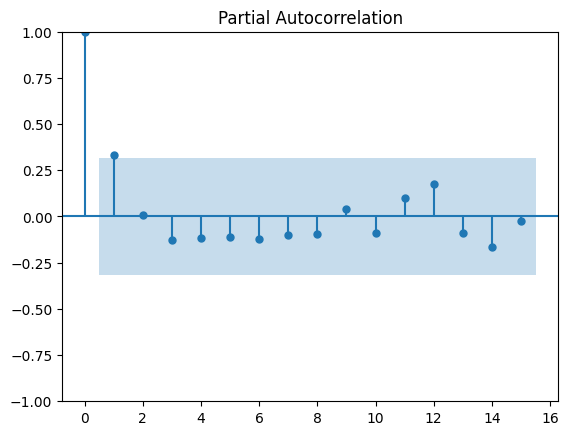

In [58]:

plot_pacf(train['upper Sales'],lags=15)
plt.show()

In [59]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['upper Sales'] , order = (1,0,1) ,  seasonal_order = (1,0,1,12))
result = model.fit()
predict = result.forecast(steps = len(test))



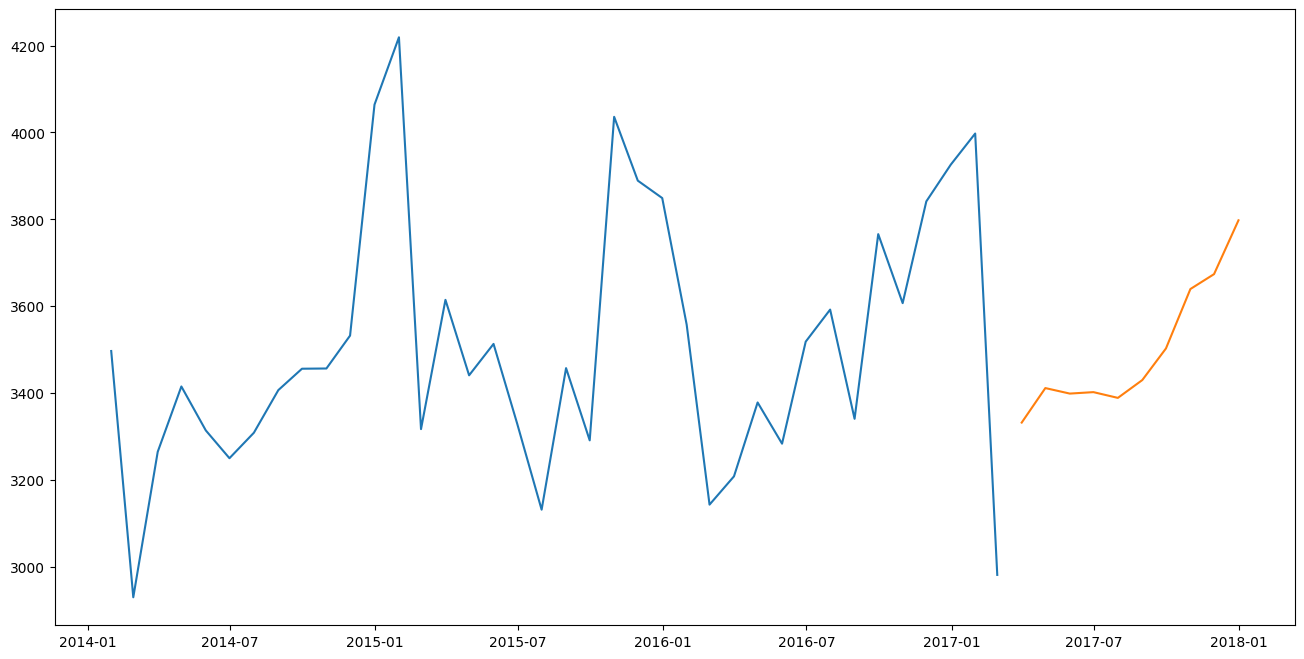

In [60]:
plt.figure(figsize=(16,8))
plt.plot(train['upper Sales'])
plt.plot(test.index , predict)
plt.show()